In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
year = '2020'

In [3]:
df = pd.read_csv('04 - dvf_with_gps_iris_' + year + '.csv', dtype = {'code_iris_clean': str,
                                                                                             'Code departement' : str,
                                                                                             'Code postal 5 chiffres' : str,
                                                                                             'Code commune INSEE': str})
df.head()

C:\Users\olivier\anaconda\envs\Geo\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (18,20,22,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,...,Paris,dep_name,region_name,Mer,Commune_Lat,Commune_Lon,lon,lat,Code postal 5 chiffres,code_iris_clean
0,0,1,02/01/2020,Vente,268800.0,14.0,NaN,RUE,0411,DE L'ARCADE,...,1,Paris,Île-de-France,0,NaN,NaN,2.323688,48.871652,75008,751083106
1,1,1,06/01/2020,Vente,878378.0,9.0,NaN,BD,5888,DE LA MADELEINE,...,1,Paris,Île-de-France,0,NaN,NaN,2.326961,48.869560,75001,751010402
2,2,1,10/01/2020,Vente,680000.0,10.0,NaN,RUE,1200,DU BOURG L'ABBE,...,1,Paris,Île-de-France,0,NaN,NaN,2.351889,48.864062,75003,751031204
3,3,1,08/01/2020,Vente,370000.0,79.0,NaN,RUE,0420,DES ARCHIVES,...,1,Paris,Île-de-France,0,NaN,NaN,2.359887,48.863220,75003,751031003
4,4,1,09/01/2020,Vente,741500.0,131.0,NaN,RUE,8525,SAINT DENIS,...,1,Paris,Île-de-France,0,NaN,NaN,2.347447,48.858758,75001,751010101


In [4]:
bpe = pd.read_csv('05 - equipements_nb_clean.csv', dtype = {'code_iris_clean': str})
bpe.head()

,code_iris_clean,Alimentation,Aéroport,Baignade,Banques,Boulangerie,Camping,Cinéma,Collège ou lycée,Crèche,...,Hotels,Info touristique,Parcours sportif/santé,Pharmacie,Police ou gendarmerie,Port plaisance,Restaurants,Resto U,Résidence U,Salle multisport
0,010010000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,010040101,6,0,0,1,3,0,0,1,0,...,0,0,0,1,1,0,10,0,0,3
2,010040102,4,0,0,0,2,0,0,0,0,...,0,0,0,1,0,0,18,0,0,0
3,010040201,2,0,0,5,4,0,1,2,1,...,0,0,0,4,0,0,12,0,0,0
4,010040202,3,0,0,6,1,0,0,1,1,...,1,1,1,0,0,0,5,0,0,2


In [5]:
df_new = df.merge(bpe, on = "code_iris_clean", how = "left")
df_new.head()

,Unnamed: 0,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,...,Hotels,Info touristique,Parcours sportif/santé,Pharmacie,Police ou gendarmerie,Port plaisance,Restaurants,Resto U,Résidence U,Salle multisport
0,0,1,02/01/2020,Vente,268800.0,14.0,NaN,RUE,0411,DE L'ARCADE,...,22.0,6.0,0.0,2.0,0.0,0.0,93.0,0.0,0.0,0.0
1,1,1,06/01/2020,Vente,878378.0,9.0,NaN,BD,5888,DE LA MADELEINE,...,12.0,8.0,0.0,4.0,1.0,0.0,87.0,0.0,0.0,0.0
2,2,1,10/01/2020,Vente,680000.0,10.0,NaN,RUE,1200,DU BOURG L'ABBE,...,2.0,4.0,0.0,1.0,1.0,0.0,36.0,0.0,0.0,1.0
3,3,1,08/01/2020,Vente,370000.0,79.0,NaN,RUE,0420,DES ARCHIVES,...,3.0,4.0,0.0,1.0,0.0,0.0,50.0,0.0,0.0,0.0
4,4,1,09/01/2020,Vente,741500.0,131.0,NaN,RUE,8525,SAINT DENIS,...,5.0,2.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0


In [6]:
df_new = df_new.drop(columns = {'Unnamed: 0'})

In [7]:
pd.set_option('display.max_columns', None) 
df_new.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Code commune INSEE,Ville,Adresse,Commune Alt,Prix m2,Paris,dep_name,region_name,Mer,Commune_Lat,Commune_Lon,lon,lat,Code postal 5 chiffres,code_iris_clean,Alimentation,Aéroport,Baignade,Banques,Boulangerie,Camping,Cinéma,Collège ou lycée,Crèche,Ecole mat et primaire,Ecole sup,Etab hospi,Gare,Gare nationale,Hotels,Info touristique,Parcours sportif/santé,Pharmacie,Police ou gendarmerie,Port plaisance,Restaurants,Resto U,Résidence U,Salle multisport
0,1,02/01/2020,Vente,268800.0,14.0,NaN,RUE,0411,DE L'ARCADE,75008.0,PARIS,75,108,NaN,BS,136,NaN,31,NaN,8.0,22.72,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,24.0,1.0,NaN,NaN,NaN,75108,75008 PARIS 08,14 RUE DE L'ARCADE 75008 PARIS,PARIS,11200.000000,1,Paris,Île-de-France,0,NaN,NaN,2.323688,48.871652,75008,751083106,5.0,0.0,0.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,6.0,0.0,2.0,0.0,0.0,93.0,0.0,0.0,0.0
1,1,06/01/2020,Vente,878378.0,9.0,NaN,BD,5888,DE LA MADELEINE,75001.0,PARIS,75,101,NaN,BC,41,NaN,14,66.64,15.0,NaN,40.0,NaN,NaN,NaN,NaN,NaN,3,2.0,Appartement,NaN,66.0,2.0,NaN,NaN,NaN,75101,75001 PARIS 01,9 BD DE LA MADELEINE 75001 PARIS,PARIS,13308.757576,1,Paris,Île-de-France,0,NaN,NaN,2.326961,48.869560,75001,751010402,4.0,0.0,0.0,22.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0,8.0,0.0,4.0,1.0,0.0,87.0,0.0,0.0,0.0
2,1,10/01/2020,Vente,680000.0,10.0,NaN,RUE,1200,DU BOURG L'ABBE,75003.0,PARIS,75,103,NaN,AV,6,NaN,9,50.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,51.0,2.0,NaN,NaN,NaN,75103,75003 PARIS 03,10 RUE DU BOURG L'ABBE 75003 PARIS,PARIS,13333.333333,1,Paris,Île-de-France,0,NaN,NaN,2.351889,48.864062,75003,751031204,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,1.0,0.0,36.0,0.0,0.0,1.0
3,1,08/01/2020,Vente,370000.0,79.0,NaN,RUE,0420,DES ARCHIVES,75003.0,PARIS,75,103,NaN,AI,49,NaN,35,22.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,21.0,1.0,NaN,NaN,NaN,75103,75003 PARIS 03,79 RUE DES ARCHIVES 75003 PARIS,PARIS,17619.047619,1,Paris,Île-de-France,0,NaN,NaN,2.359887,48.863220,75003,751031003,9.0,0.0,0.0,1.0,9.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,1.0,0.0,0.0,50.0,0.0,0.0,0.0
4,1,09/01/2020,Vente,741500.0,131.0,NaN,RUE,8525,SAINT DENIS,75001.0,PARIS,75,101,NaN,AQ,107,NaN,23,61.41,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,61.0,2.0,NaN,NaN,NaN,75101,75001 PARIS 01,131 RUE SAINT DENIS 75001 PARIS,PARIS,12155.737705,1,Paris,Île-de-France,0,NaN,NaN,2.347447,48.858758,75001,751010101,2.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0


In [8]:
df_new = df_new.drop(columns = {'No disposition', 'Nature mutation', 'No voie', 'B/T/Q', 'Code voie', 'Voie', 'Code postal',
                               'Commune Alt', 'Code commune', 'Prefixe de section', 'Section', 'No plan', 'No Volume',
                               '1er lot', 'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
                               '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot', 'Surface Carrez du 4eme lot',
                               '5eme lot', 'Surface Carrez du 5eme lot', 'Code type local', 'Identifiant local',
                               'Nature culture', 'Nature culture speciale', 'Ville', 'Commune_Lat', 'Commune_Lon'})

In [9]:
df_new.head()

,Date mutation,Valeur fonciere,Type de voie,Commune,Code departement,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Code commune INSEE,Adresse,Prix m2,Paris,dep_name,region_name,Mer,lon,lat,Code postal 5 chiffres,code_iris_clean,Alimentation,Aéroport,Baignade,Banques,Boulangerie,Camping,Cinéma,Collège ou lycée,Crèche,Ecole mat et primaire,Ecole sup,Etab hospi,Gare,Gare nationale,Hotels,Info touristique,Parcours sportif/santé,Pharmacie,Police ou gendarmerie,Port plaisance,Restaurants,Resto U,Résidence U,Salle multisport
0,02/01/2020,268800.0,RUE,PARIS,75,2,Appartement,24.0,1.0,NaN,75108,14 RUE DE L'ARCADE 75008 PARIS,11200.000000,1,Paris,Île-de-France,0,2.323688,48.871652,75008,751083106,5.0,0.0,0.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,6.0,0.0,2.0,0.0,0.0,93.0,0.0,0.0,0.0
1,06/01/2020,878378.0,BD,PARIS,75,3,Appartement,66.0,2.0,NaN,75101,9 BD DE LA MADELEINE 75001 PARIS,13308.757576,1,Paris,Île-de-France,0,2.326961,48.869560,75001,751010402,4.0,0.0,0.0,22.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0,8.0,0.0,4.0,1.0,0.0,87.0,0.0,0.0,0.0
2,10/01/2020,680000.0,RUE,PARIS,75,1,Appartement,51.0,2.0,NaN,75103,10 RUE DU BOURG L'ABBE 75003 PARIS,13333.333333,1,Paris,Île-de-France,0,2.351889,48.864062,75003,751031204,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,1.0,0.0,36.0,0.0,0.0,1.0
3,08/01/2020,370000.0,RUE,PARIS,75,1,Appartement,21.0,1.0,NaN,75103,79 RUE DES ARCHIVES 75003 PARIS,17619.047619,1,Paris,Île-de-France,0,2.359887,48.863220,75003,751031003,9.0,0.0,0.0,1.0,9.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,1.0,0.0,0.0,50.0,0.0,0.0,0.0
4,09/01/2020,741500.0,RUE,PARIS,75,2,Appartement,61.0,2.0,NaN,75101,131 RUE SAINT DENIS 75001 PARIS,12155.737705,1,Paris,Île-de-France,0,2.347447,48.858758,75001,751010101,2.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0


In [10]:
df_new.shape

(540524, 45)

In [11]:
df_new =  df_new.dropna(axis = 0, how = 'all', subset = ['lat','lon','code_iris_clean'])
df_new.shape

(504315, 45)

In [12]:
loy = pd.read_csv('05 - loyers_2018_par_commune_typelocal.csv')
loy = loy.rename(columns = {'INSEE': 'Code commune INSEE'})
loy.head()

,Code commune INSEE,loy_appart,loy_maison
0,01001,9.372335,8.191701
1,01002,8.635552,7.441199
2,01004,10.074507,8.411184
3,01005,9.372335,9.039551
4,01006,8.966955,8.058265


In [13]:
df_new = df_new.merge(loy, on = 'Code commune INSEE', how = "left")
df_new.head()

,Date mutation,Valeur fonciere,Type de voie,Commune,Code departement,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Code commune INSEE,Adresse,Prix m2,Paris,dep_name,region_name,Mer,lon,lat,Code postal 5 chiffres,code_iris_clean,Alimentation,Aéroport,Baignade,Banques,Boulangerie,Camping,Cinéma,Collège ou lycée,Crèche,Ecole mat et primaire,Ecole sup,Etab hospi,Gare,Gare nationale,Hotels,Info touristique,Parcours sportif/santé,Pharmacie,Police ou gendarmerie,Port plaisance,Restaurants,Resto U,Résidence U,Salle multisport,loy_appart,loy_maison
0,02/01/2020,268800.0,RUE,PARIS,75,2,Appartement,24.0,1.0,NaN,75108,14 RUE DE L'ARCADE 75008 PARIS,11200.000000,1,Paris,Île-de-France,0,2.323688,48.871652,75008,751083106,5.0,0.0,0.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,6.0,0.0,2.0,0.0,0.0,93.0,0.0,0.0,0.0,35.002977,30.939697
1,06/01/2020,878378.0,BD,PARIS,75,3,Appartement,66.0,2.0,NaN,75101,9 BD DE LA MADELEINE 75001 PARIS,13308.757576,1,Paris,Île-de-France,0,2.326961,48.869560,75001,751010402,4.0,0.0,0.0,22.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0,8.0,0.0,4.0,1.0,0.0,87.0,0.0,0.0,0.0,36.654438,30.939697
2,10/01/2020,680000.0,RUE,PARIS,75,1,Appartement,51.0,2.0,NaN,75103,10 RUE DU BOURG L'ABBE 75003 PARIS,13333.333333,1,Paris,Île-de-France,0,2.351889,48.864062,75003,751031204,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,1.0,0.0,36.0,0.0,0.0,1.0,34.206456,30.939697
3,08/01/2020,370000.0,RUE,PARIS,75,1,Appartement,21.0,1.0,NaN,75103,79 RUE DES ARCHIVES 75003 PARIS,17619.047619,1,Paris,Île-de-France,0,2.359887,48.863220,75003,751031003,9.0,0.0,0.0,1.0,9.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,1.0,0.0,0.0,50.0,0.0,0.0,0.0,34.206456,30.939697
4,09/01/2020,741500.0,RUE,PARIS,75,2,Appartement,61.0,2.0,NaN,75101,131 RUE SAINT DENIS 75001 PARIS,12155.737705,1,Paris,Île-de-France,0,2.347447,48.858758,75001,751010101,2.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,36.654438,30.939697


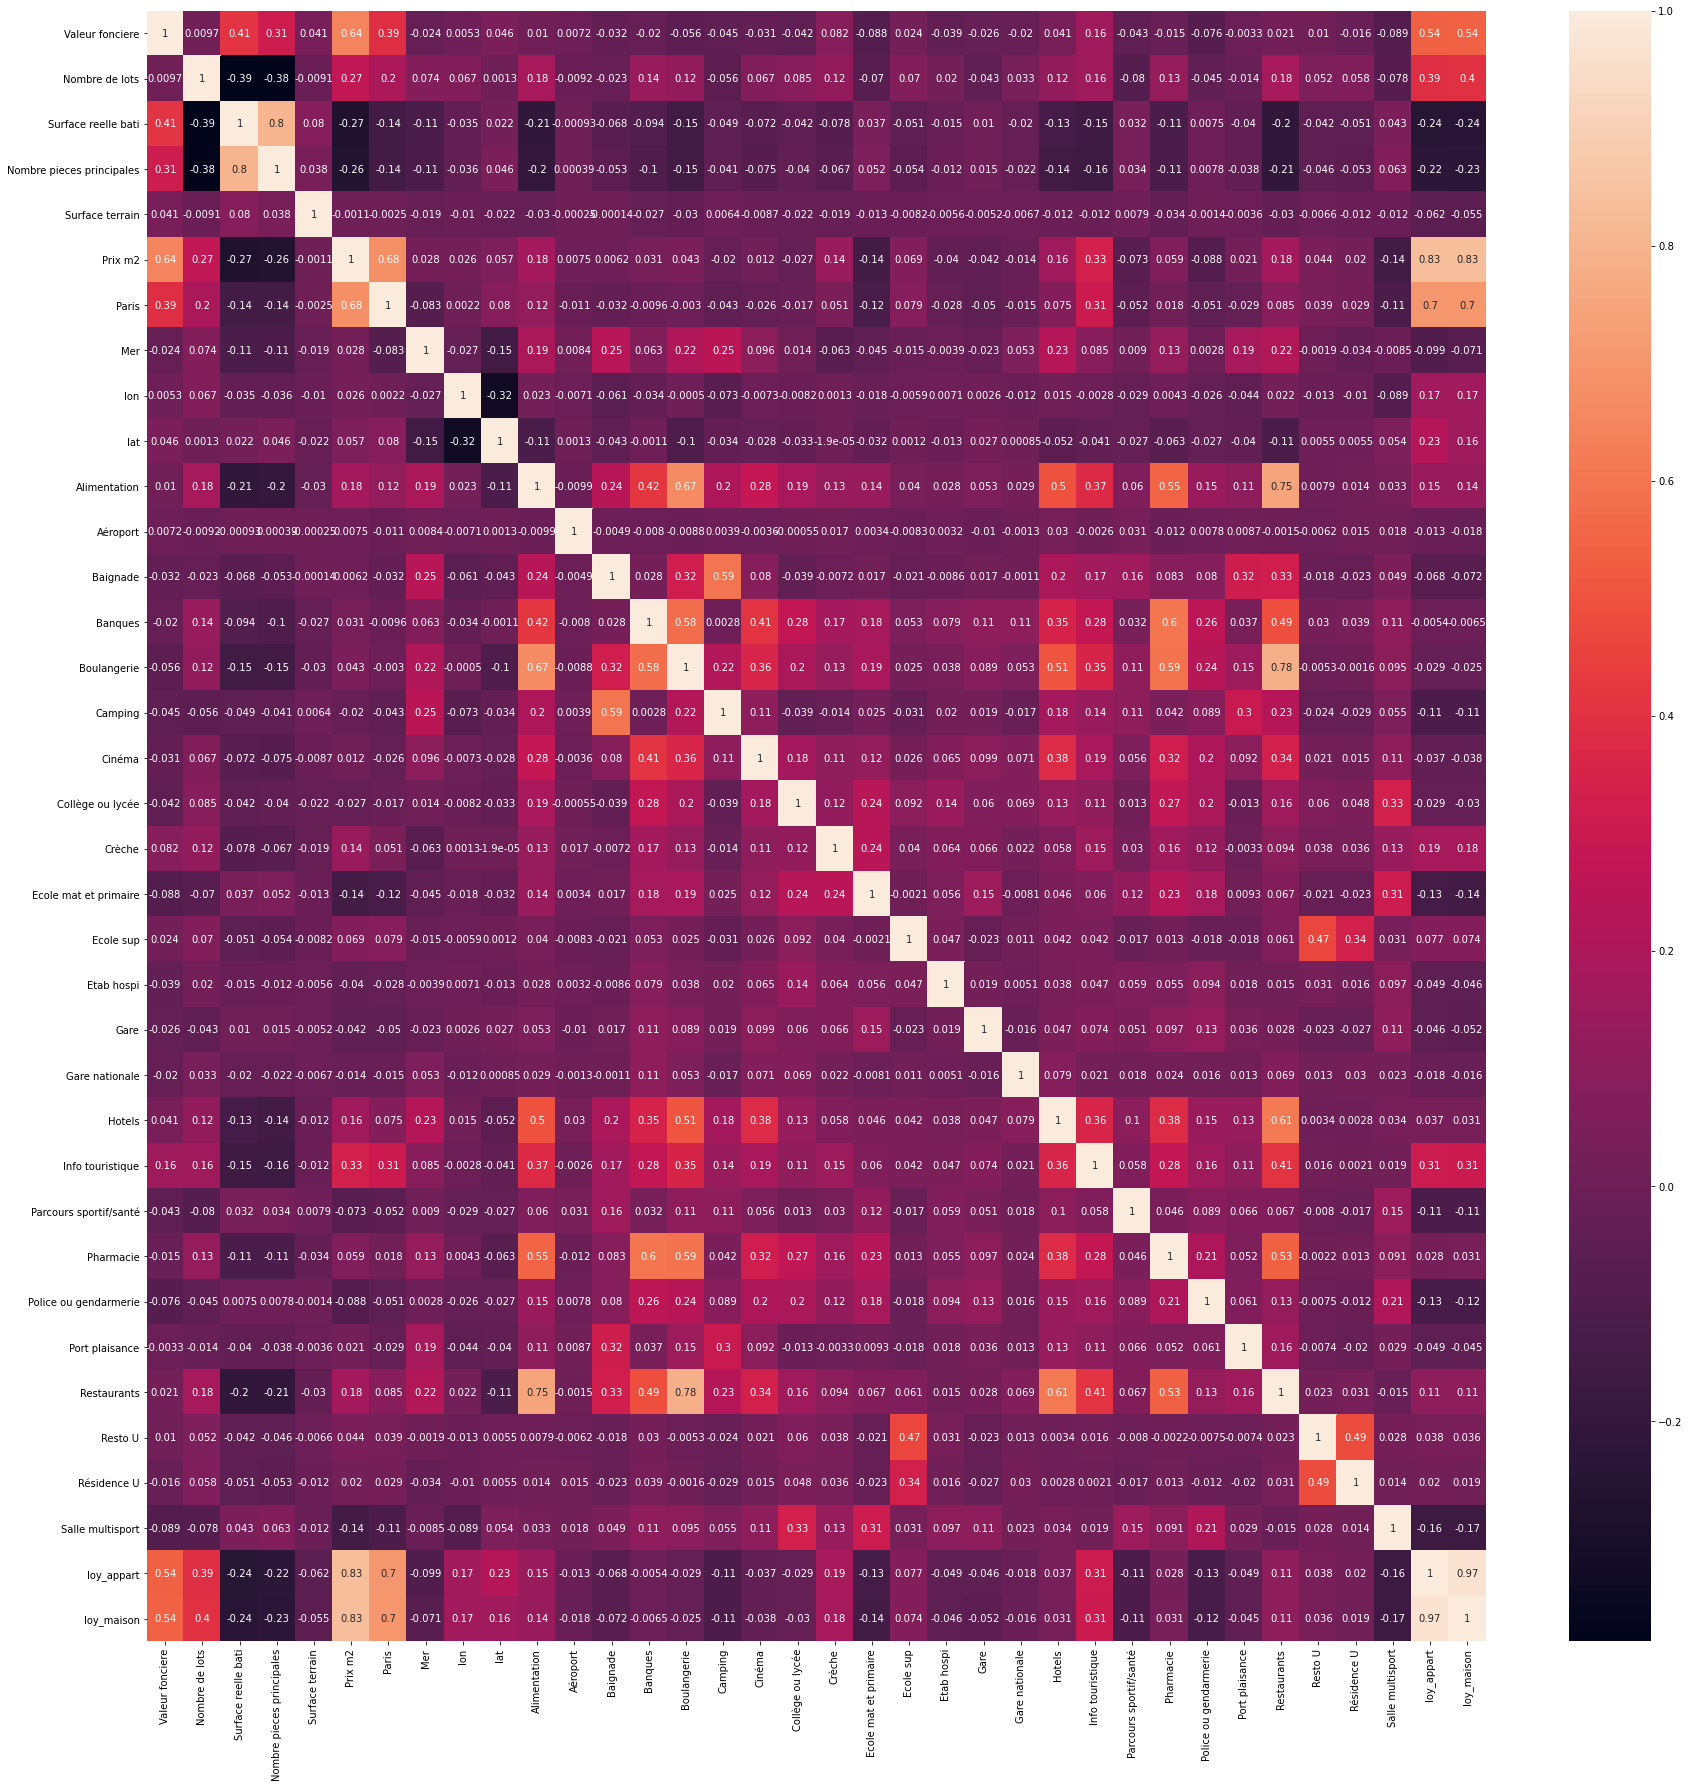

In [14]:
plt.figure(figsize = (30, 30))
matrice_correlation = df_new.corr()
sns.heatmap(matrice_correlation, annot = True);

In [15]:
df_new.to_csv('06 - dvf_with_equip_loyers_' + year + '.csv')